## Imports

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

## Load data

In [2]:
data = pd.read_csv('200103-1-1_results.csv')
info = pd.read_csv('sample_info.csv')
merged = data.merge(info, on='Accession')
merged.head()
merged.to_csv('merged.csv')

In [3]:
merged.head()

,Accession,total_reads,t7_reads,t7_normalized_reads,ecoli_reads,ecoli_normalized_reads,ecoli_coverage,kpneumo_reads,kpneumo_normalized_reads,kpneumo_coverage,...,Human,Bacteria,Virus,Parasite,Fungus,Unclassified,DNAse,Pool,Pool replicate,Organism spike
0,IDBD-D101193,3951143,5186,13125.315890,89942,227635.395631,0.959417,7676,19427.289774,0.887048,...,5.105814e+05,8.888296e+06,13224.021505,3345.867259,15511.967043,569040.401727,Thermo Dnase I,Pool 1,Pool 1a,E.coli
1,IDBD-D101194,2868624,4167,14526.128206,64771,225791.180719,0.914126,6002,20922.923325,0.877753,...,5.045729e+05,8.944131e+06,15178.008690,2499.456185,16171.516379,517446.692212,Thermo Dnase I,Pool 1,Pool 1b,E.coli
2,IDBD-D101195,542,0,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,...,6.678967e+06,2.269373e+06,0.000000,55350.553506,0.000000,996309.963100,Thermo Dnase I,Pool 5,Pool 5a,E.coli
3,IDBD-D101196,2729049,6087,22304.473097,4966,18196.815081,0.606726,100,366.428012,0.000000,...,5.579596e+06,3.522036e+06,24499.376889,25422.775480,1377.769326,847067.971297,Thermo Dnase I,Pool 5,Pool 5b,E.coli
4,IDBD-D101197,2917044,44521,152623.683427,1942,6657.424434,0.000000,64339,220562.322680,0.999798,...,7.075176e+05,8.855797e+06,147210.669431,4898.794807,349.669049,284226.086408,Thermo Dnase I,Pool 6,Pool 6a,K.pneumo


## T7 Normalized Reads

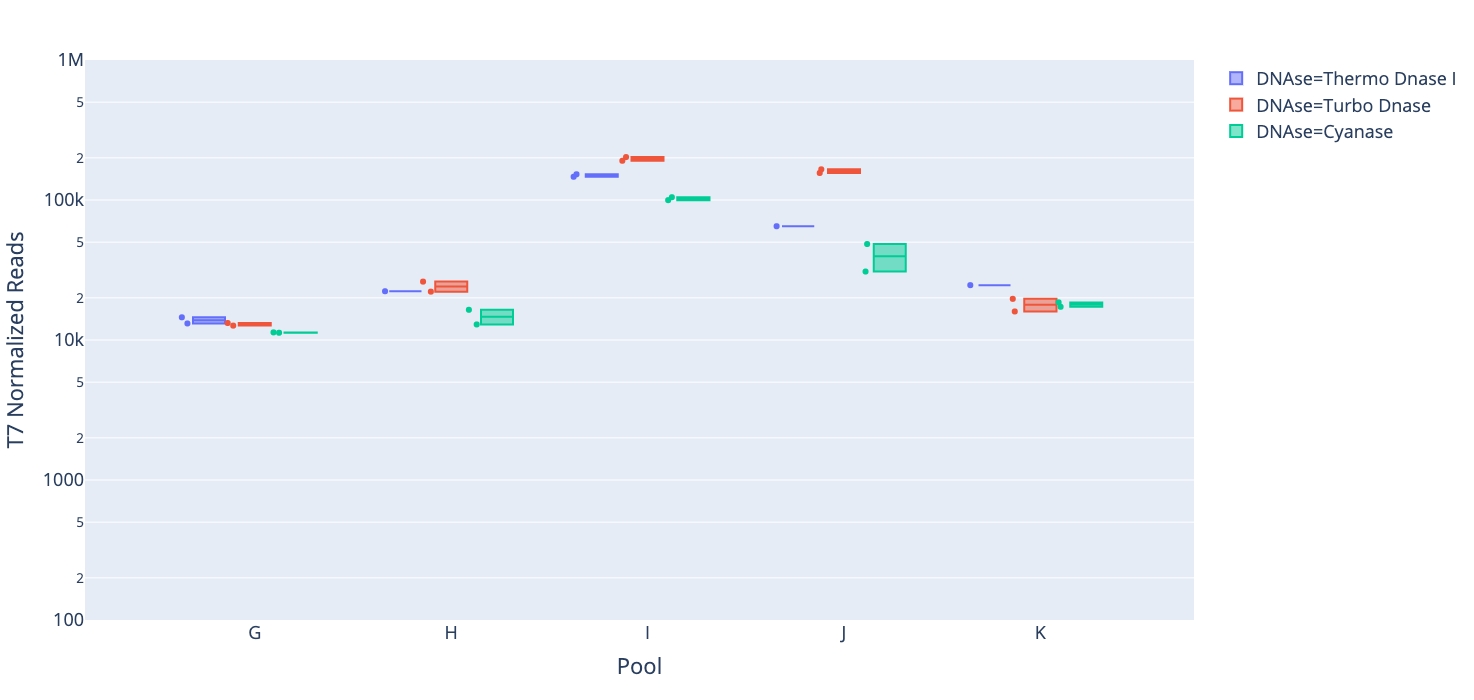

In [35]:
fig = px.box(
    merged[
        ~(merged['t7_normalized_reads'] == 0)
#         & (merged['Pool'].isin(['Pool 7']))
    ].replace({
        'Pool 1': 'G',
        'Pool 5': 'H',
        'Pool 6': 'I',
        'Pool 7': 'J',
        'Pool 8': 'K'
    }),
    x='Pool',
    y='t7_normalized_reads',
    color='DNAse',
    labels={'t7_normalized_reads': 'T7 Normalized Reads'},
    points='all',
    hover_data=['Accession'],
    log_y=True
)
fig.update_layout(
    font=dict(size=18),
    height=700,
    width=1400
)
fig.update_yaxes(range=[2, 6])
fig.show()
fig.write_html('plots/T7_normalized_reads.html')

## Human Reads

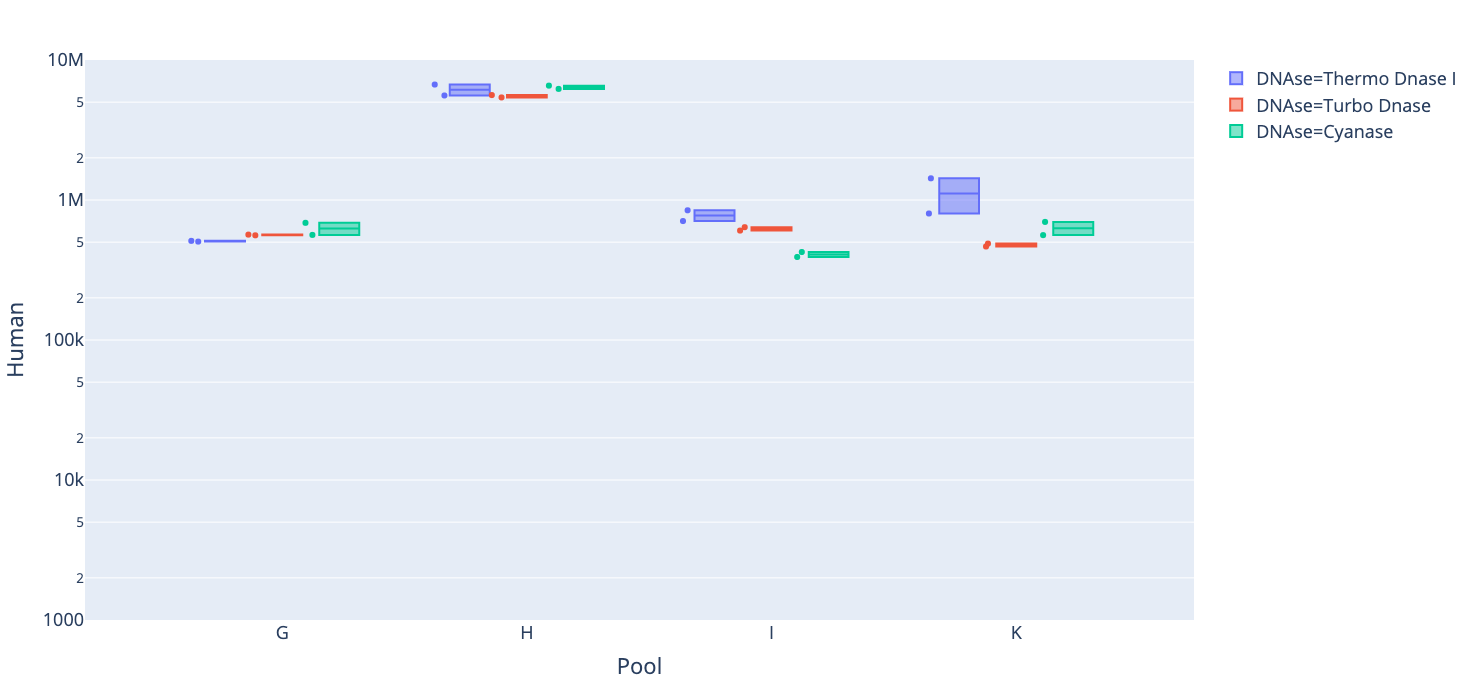

In [38]:
fig = px.box(
    merged[~(merged['Pool'] == 'Pool 7')].replace({
        'Pool 1': 'G',
        'Pool 5': 'H',
        'Pool 6': 'I',
        'Pool 7': 'J',
        'Pool 8': 'K'
    }),
    x='Pool',
#     x='Organism',
    y='Human',
    color='DNAse',
    points='all',
    hover_data=['Accession'],
    log_y=True
)
fig.update_layout(height=700)
fig.update_layout(
    font=dict(size=18),
    height=700,
    width=1400
)
fig.update_yaxes(range=[3, 7])
fig.show()
fig.write_html('plots/Human_normalized_reads.html')

In [53]:
merged[(merged['Pool'].isin(['Pool 1', 'Pool 5']))].replace({
        'Pool 1': 'G',
        'Pool 5': 'H',
        'Pool 6': 'I',
        'Pool 7': 'J',
        'Pool 8': 'K'
    })
merged.columns

Index(['Accession', 'total_reads', 't7_reads', 't7_normalized_reads',
       'ecoli_reads', 'ecoli_normalized_reads', 'ecoli_coverage',
       'kpneumo_reads', 'kpneumo_normalized_reads', 'kpneumo_coverage',
       'calbicans_reads', 'calbicans_normalized_reads', 'calbicans_coverage',
       'saureus_reads', 'saureus_normalized_reads', 'saureus_coverage',
       'sagal_reads', 'sagal_normalized_reads', 'sagal_coverage',
       'sepiderm_reads', 'sepiderm_normalized_reads', 'sepiderm_coverage',
       'efaecalis_reads', 'efaecalis_normalized_reads', 'efaecalis_coverage',
       'Human', 'Bacteria', 'Virus', 'Parasite', 'Fungus', 'Unclassified',
       'DNAse', 'Pool', 'Pool replicate', 'Organism spike'],
      dtype='object')

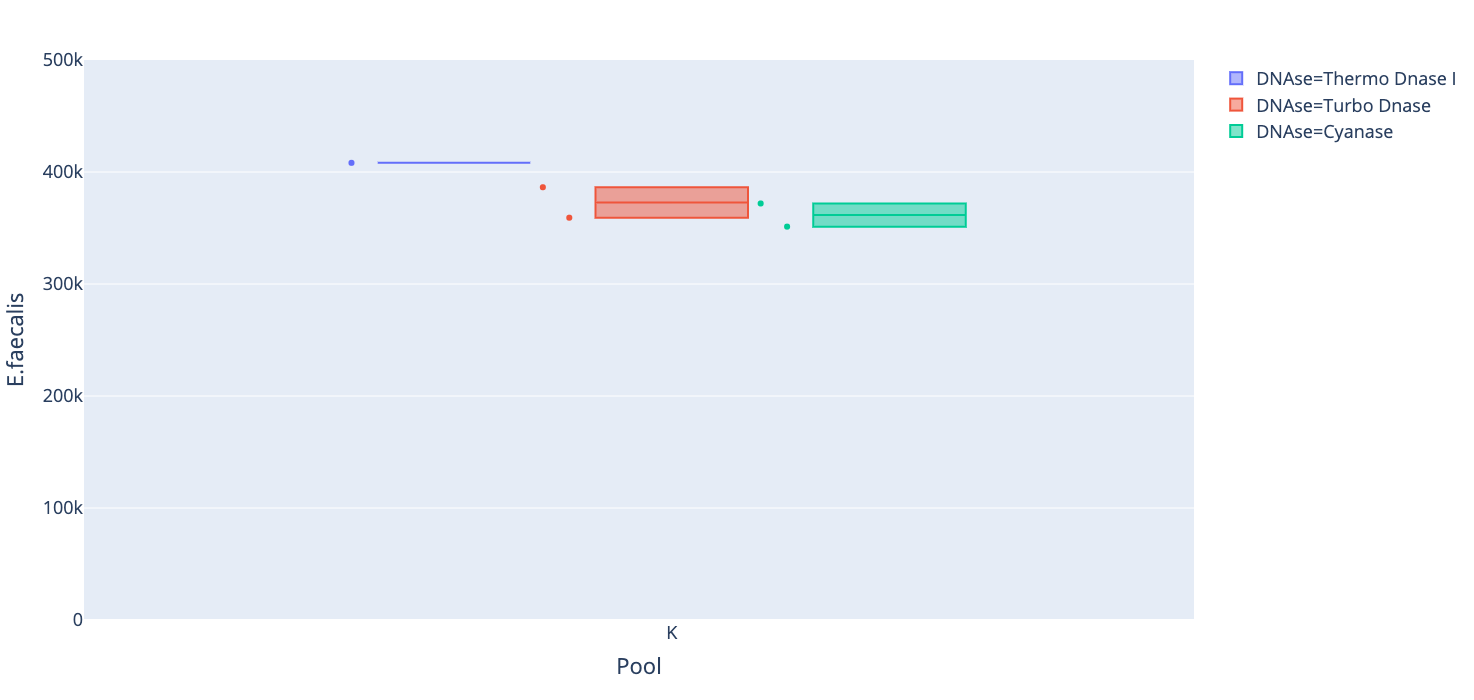

In [56]:
fig = px.box(
    merged[(merged['Pool'].isin(['Pool 8'])) & ~(merged['Accession'] == 'IDBD-D101195') & ~(merged['efaecalis_normalized_reads'] == 0)].replace({
        'Pool 1': 'G',
        'Pool 5': 'H',
        'Pool 6': 'I',
        'Pool 7': 'J',
        'Pool 8': 'K'
    }),
    x='Pool',
#     x='DNAse',
    y='efaecalis_normalized_reads',
    color='DNAse',
    points='all',
    hover_data=['Accession'],
#     log_y=True,
    labels={'ecoli_normalized_reads': 'E.coli',
            'kpneumo_normalized_reads': 'K.pneumo',
            'efaecalis_normalized_reads': 'E.faecalis'}
)
fig.update_layout(height=700)
fig.update_layout(
    font=dict(size=18),
    height=700,
    width=600
)
fig.update_yaxes(range=[0, 0.5e6])
fig.show()
fig.write_html('plots/Human_normalized_reads.html')

## Organism reads

In [6]:
merged.columns

Index(['Accession', 'total_reads', 't7_reads', 't7_normalized_reads',
       'ecoli_reads', 'ecoli_normalized_reads', 'ecoli_coverage',
       'kpneumo_reads', 'kpneumo_normalized_reads', 'kpneumo_coverage',
       'calbicans_reads', 'calbicans_normalized_reads', 'calbicans_coverage',
       'saureus_reads', 'saureus_normalized_reads', 'saureus_coverage',
       'sagal_reads', 'sagal_normalized_reads', 'sagal_coverage',
       'sepiderm_reads', 'sepiderm_normalized_reads', 'sepiderm_coverage',
       'efaecalis_reads', 'efaecalis_normalized_reads', 'efaecalis_coverage',
       'Human', 'Bacteria', 'Virus', 'Parasite', 'Fungus', 'Unclassified',
       'DNAse', 'Pool', 'Pool replicate', 'Organism spike'],
      dtype='object')

In [7]:
merged['Organism spike'].unique()

array(['E.coli', 'K.pneumo', 'Staepi / Streptoc / Staaur / Strep B',
       'E.faecalis'], dtype=object)

In [8]:
merged_melt = pd.melt(
    merged, 
    value_vars=[
        'ecoli_normalized_reads',
        'kpneumo_normalized_reads',
        'saureus_normalized_reads',
        'sagal_normalized_reads',
        'sepiderm_normalized_reads',
        'efaecalis_normalized_reads',
        'calbicans_normalized_reads',
        'Human'
    ],
    id_vars=['DNAse', 'Organism spike', 'Accession', 'Pool'],
    value_name='Normalized reads',
    var_name='Organism'
)
merged_melt['Organism'] = merged_melt['Organism'].replace({
    'ecoli_normalized_reads': 'Ecoli',
    'kpneumo_normalized_reads': 'Kpneumo',
    'saureus_normalized_reads': 'Saureus',
    'sagal_normalized_reads': 'Sagal',
    'sepiderm_normalized_reads': 'Staepi',
    'efaecalis_normalized_reads': 'Efaecalis',
    'calbicans_normalized_reads': 'Calbicans',
             })
merged_melt.head()

,DNAse,Organism spike,Accession,Pool,Organism,Normalized reads
0,Thermo Dnase I,E.coli,IDBD-D101193,Pool 1,Ecoli,227635.395631
1,Thermo Dnase I,E.coli,IDBD-D101194,Pool 1,Ecoli,225791.180719
2,Thermo Dnase I,E.coli,IDBD-D101195,Pool 5,Ecoli,0.000000
3,Thermo Dnase I,E.coli,IDBD-D101196,Pool 5,Ecoli,18196.815081
4,Thermo Dnase I,K.pneumo,IDBD-D101197,Pool 6,Ecoli,6657.424434


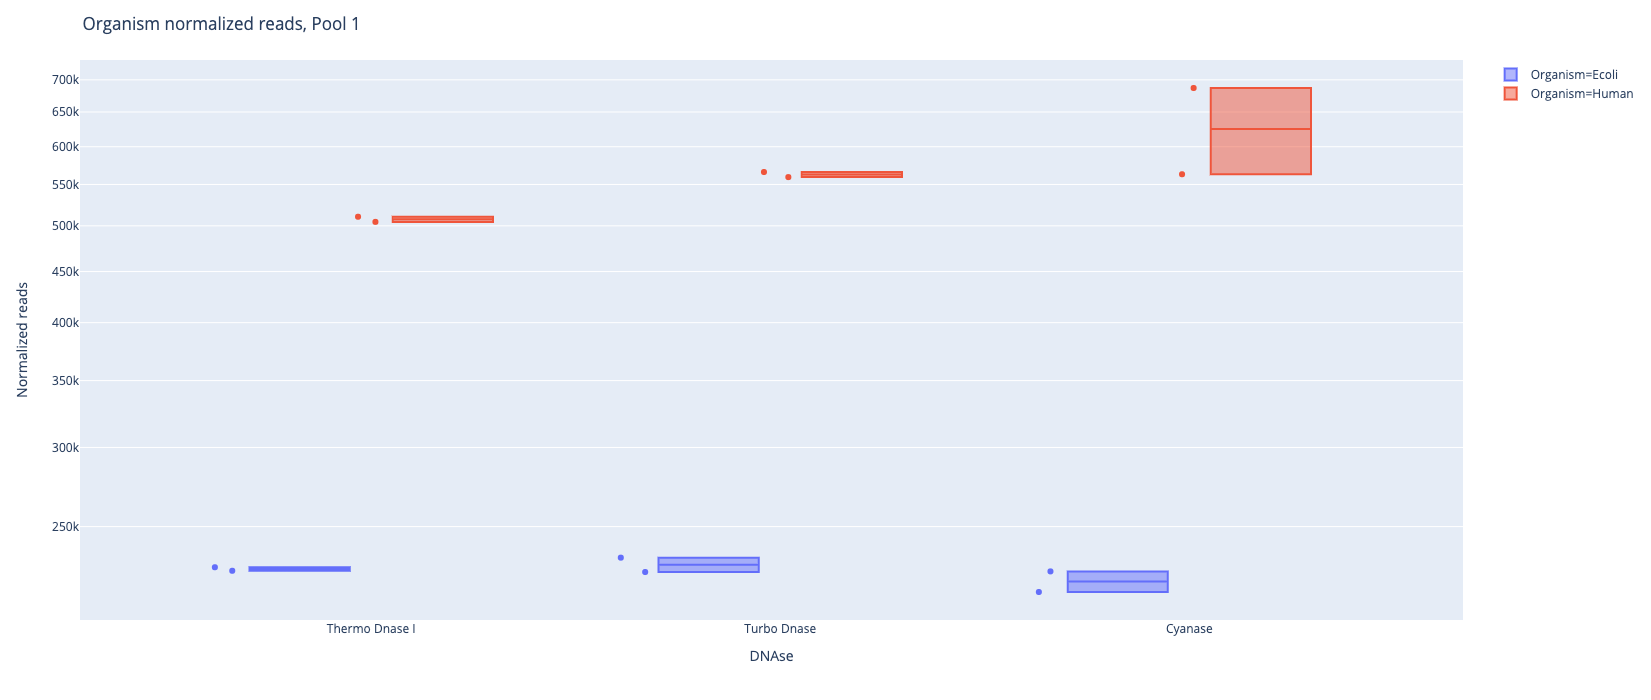

In [9]:
org_list = ['Ecoli', 'Human']
fig = px.box(merged_melt[(merged_melt['Pool'] == 'Pool 1') & (merged_melt['Organism'].isin(org_list))],
             x='DNAse', y='Normalized reads', color='Organism',
             log_y=True, points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism normalized reads, Pool 1')
fig.show()
fig.write_html('plots/Organism_normalized_reads_pool1.html')

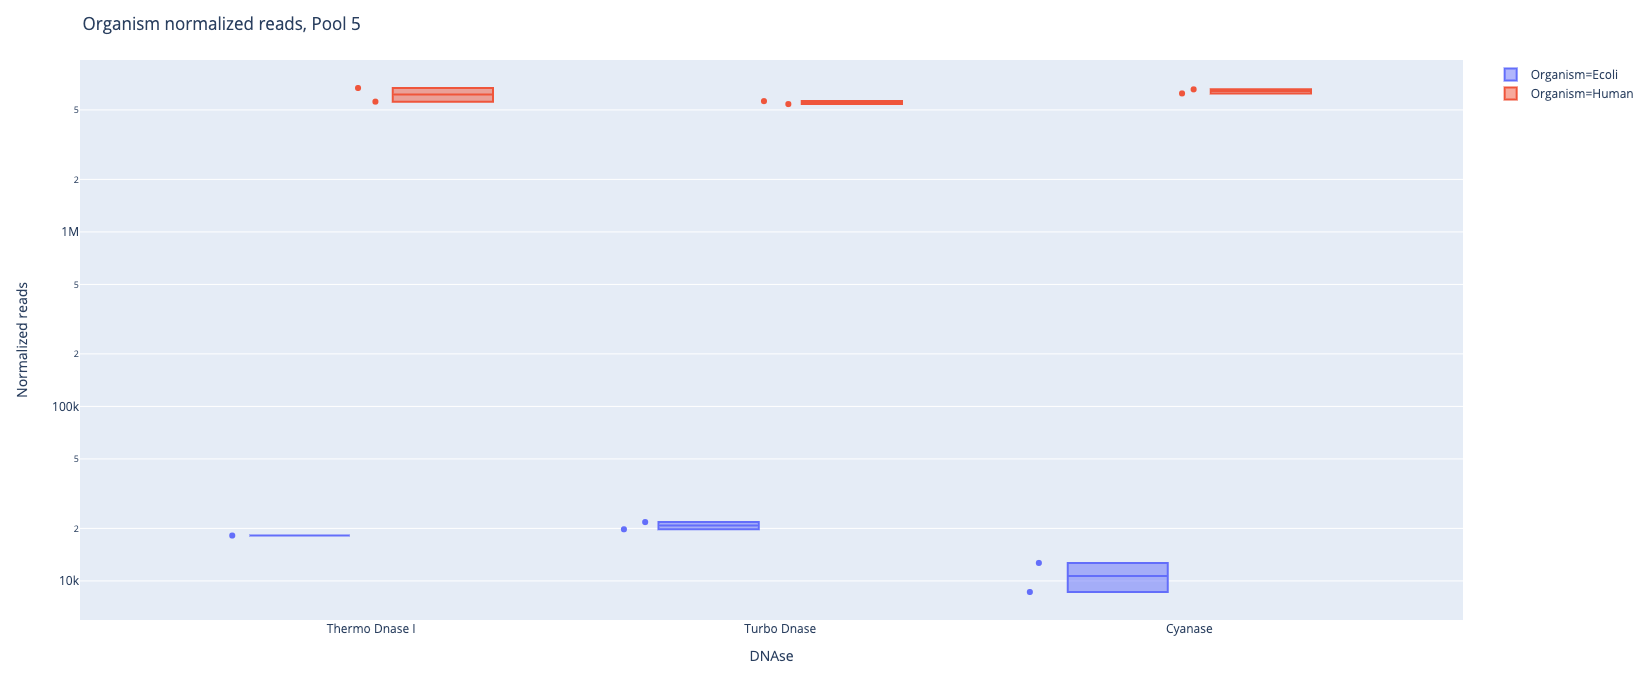

In [10]:
org_list = ['Ecoli', 'Human']
fig = px.box(merged_melt[(merged_melt['Pool'] == 'Pool 5') & (merged_melt['Organism'].isin(org_list)) & ~(merged_melt['Normalized reads'] == 0)],
             x='DNAse', y='Normalized reads', color='Organism',
             log_y=True, points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism normalized reads, Pool 5')
fig.show()
fig.write_html('plots/Organism_normalized_reads_pool5.html')

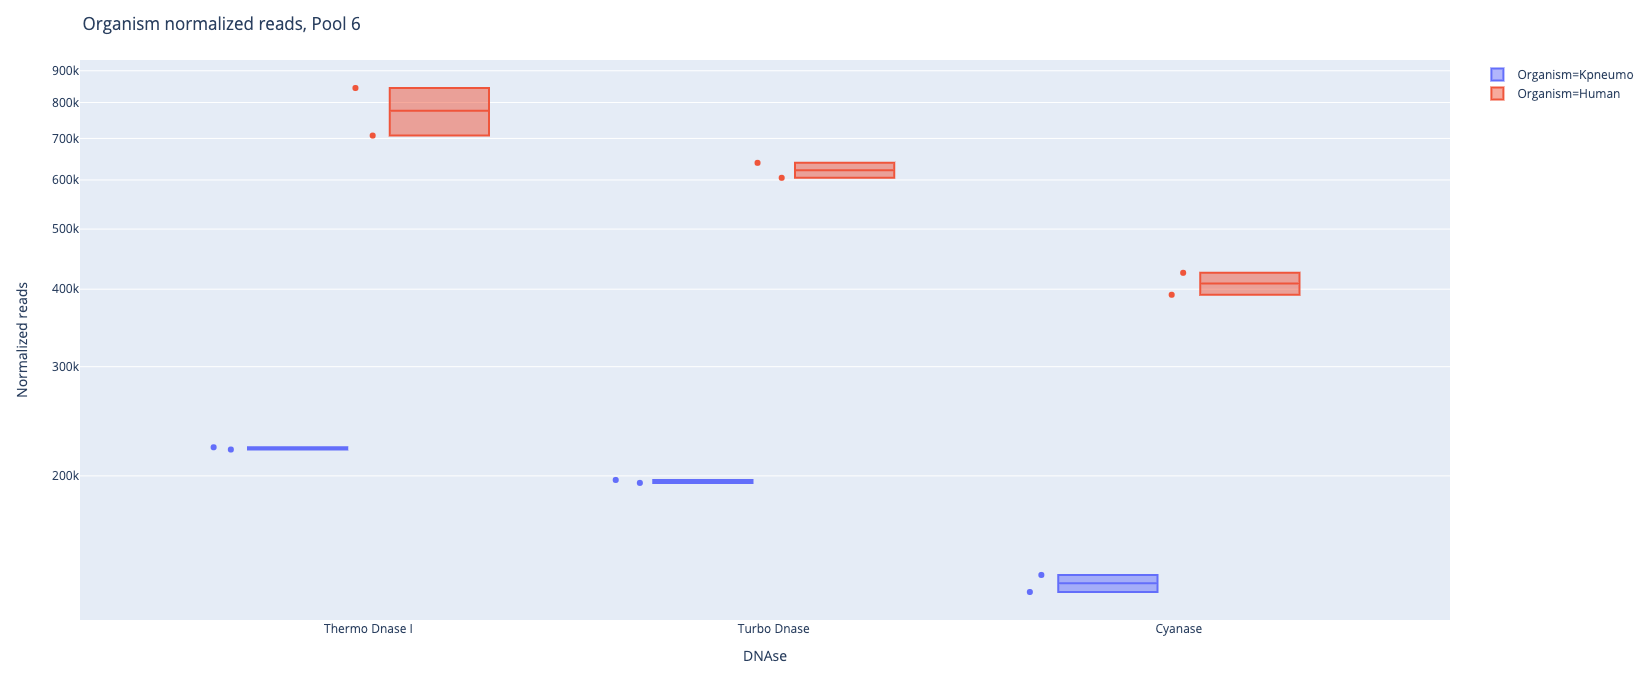

In [11]:
org_list = ['Kpneumo', 'Human']
fig = px.box(merged_melt[(merged_melt['Pool'] == 'Pool 6') & (merged_melt['Organism'].isin(org_list))],
             x='DNAse', y='Normalized reads', color='Organism',
             log_y=True, points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism normalized reads, Pool 6')
fig.show()
fig.write_html('plots/Organism_normalized_reads_pool6.html')

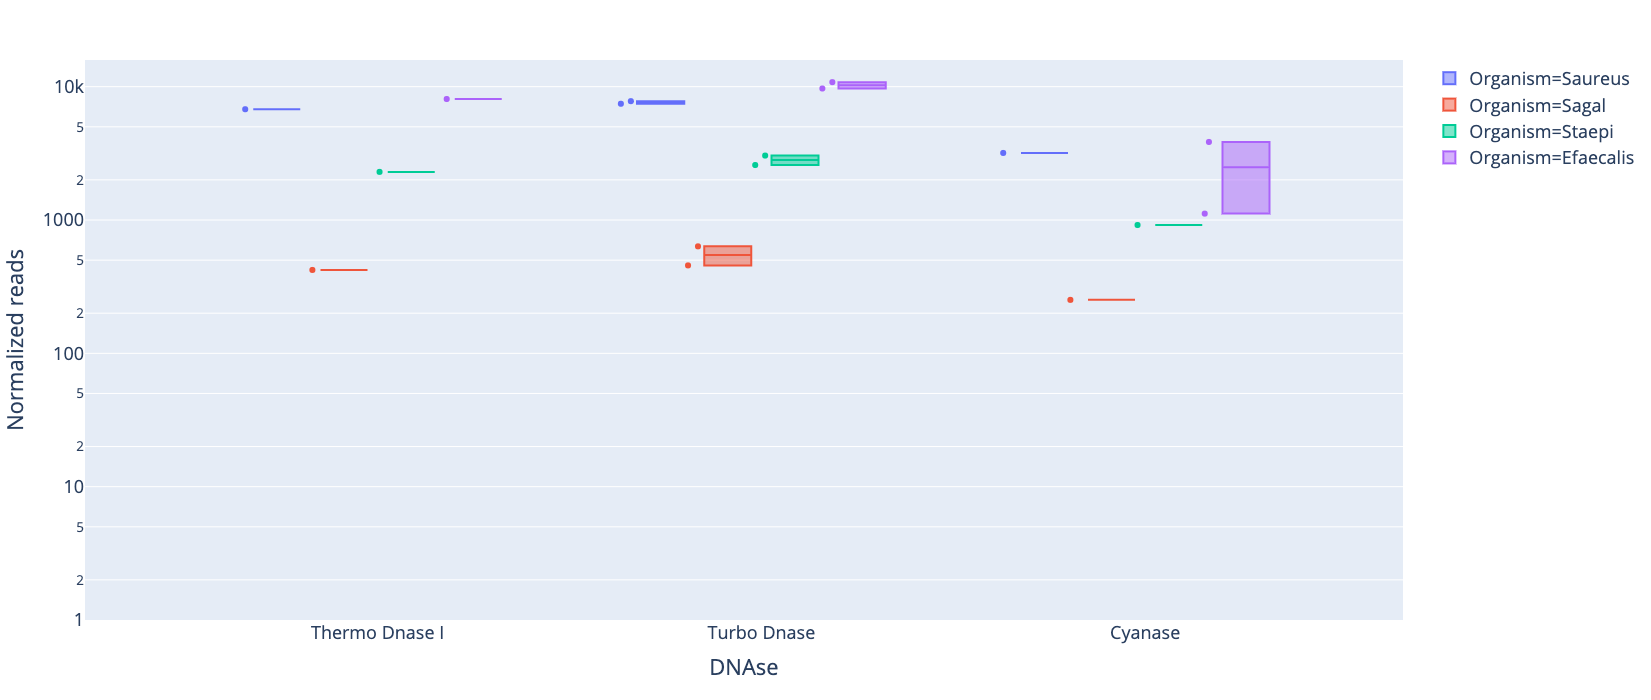

In [34]:
org_list = ['Saureus', 'Sagal', 'Staepi', 'Efaecalis']
fig = px.box(merged_melt[(merged_melt['Pool'] == 'Pool 7') & (merged_melt['Organism'].isin(org_list)) & ~(merged_melt['Normalized reads'] == 0)],
             x='DNAse', y='Normalized reads', color='Organism',
             log_y=True, points='all', hover_data=['Accession'])
fig.update_layout(height=700, width=1400, font=dict(size=18))
fig.update_yaxes(range=[0, 4.2])
fig.show()
fig.write_html('plots/Organism_normalized_reads_pool7.html')

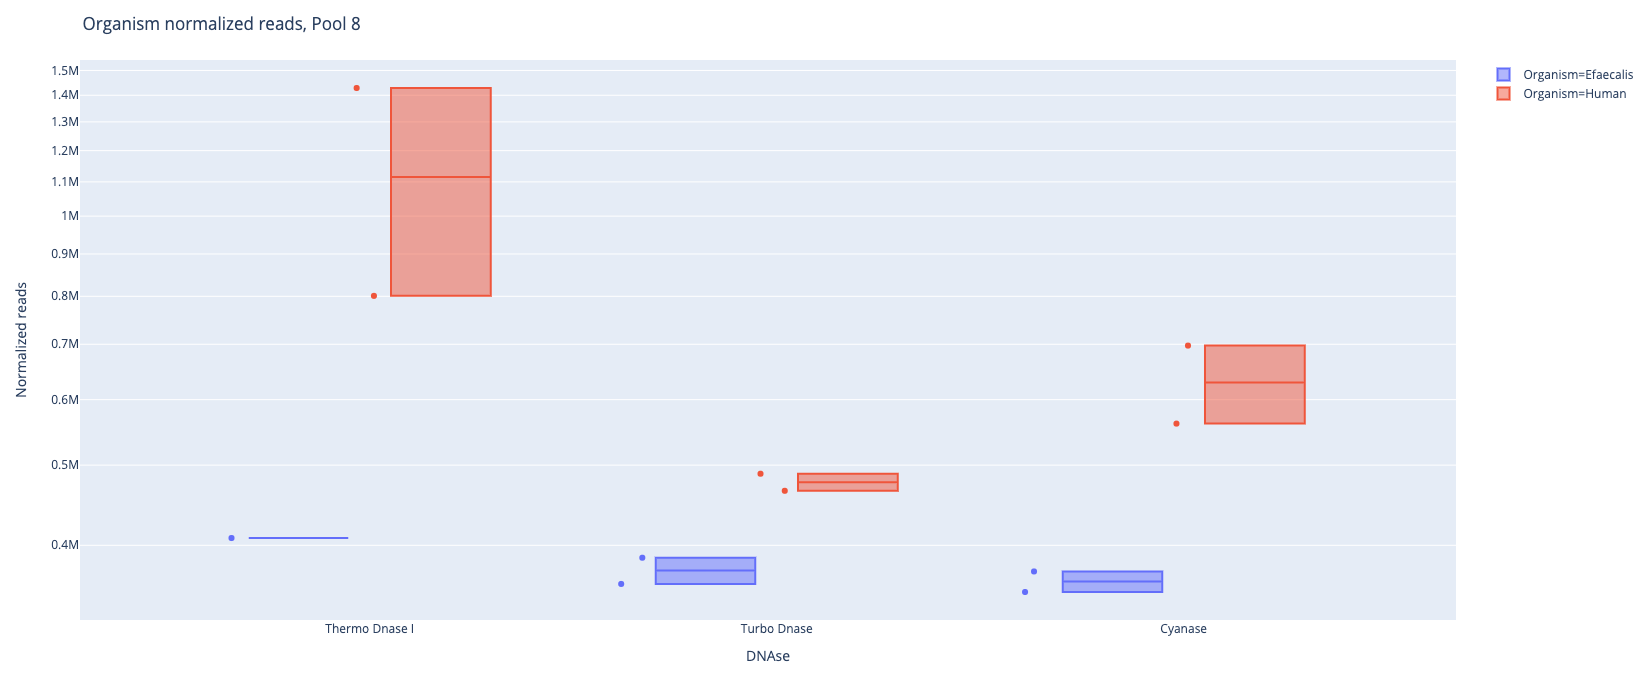

In [26]:
org_list = ['Efaecalis', 'Human']
fig = px.box(merged_melt[(merged_melt['Pool'] == 'Pool 8') & (merged_melt['Organism'].isin(org_list)) & ~(merged_melt['Normalized reads'] == 0)],
             x='DNAse', y='Normalized reads', color='Organism',
             log_y=True, points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism normalized reads, Pool 8')
fig.show()
fig.write_html('plots/Organism_normalized_reads_pool8.html')

## 16s Coverage

In [16]:
merged.columns

Index(['Accession', 'total_reads', 't7_reads', 't7_normalized_reads',
       'ecoli_reads', 'ecoli_normalized_reads', 'ecoli_coverage',
       'kpneumo_reads', 'kpneumo_normalized_reads', 'kpneumo_coverage',
       'calbicans_reads', 'calbicans_normalized_reads', 'calbicans_coverage',
       'saureus_reads', 'saureus_normalized_reads', 'saureus_coverage',
       'sagal_reads', 'sagal_normalized_reads', 'sagal_coverage',
       'sepiderm_reads', 'sepiderm_normalized_reads', 'sepiderm_coverage',
       'efaecalis_reads', 'efaecalis_normalized_reads', 'efaecalis_coverage',
       'Human', 'Bacteria', 'Virus', 'Parasite', 'Fungus', 'Unclassified',
       'DNAse', 'Pool', 'Pool replicate', 'Organism spike'],
      dtype='object')

In [17]:
merged['Organism spike'].unique()

array(['E.coli', 'K.pneumo', 'Staepi / Streptoc / Staaur / Strep B',
       'E.faecalis'], dtype=object)

In [28]:
merged_melt_cov = pd.melt(
    merged, 
    value_vars=[
        'ecoli_coverage',
        'kpneumo_coverage',
        'saureus_coverage',
        'sagal_coverage',
        'sepiderm_coverage',
        'efaecalis_coverage',
        'calbicans_coverage',
    ],
    id_vars=['DNAse', 'Organism spike', 'Accession', 'Pool'],
    value_name='Coverage',
    var_name='Organism'
)
merged_melt_cov['Organism'] = merged_melt['Organism'].replace({
    'ecoli_coverage': 'Ecoli',
    'kpneumo_coverage': 'Kpneumo',
    'saureus_coverage': 'Saureus',
    'sagal_coverage': 'Sagal',
    'sepiderm_coverage': 'Staepi',
    'efaecalis_coverage': 'Efaecalis',
    'calbicans_coverage': 'Calbicans',
             })
merged_melt_cov.head()

,DNAse,Organism spike,Accession,Pool,Organism,Coverage
0,Thermo Dnase I,E.coli,IDBD-D101193,Pool 1,Ecoli,0.959417
1,Thermo Dnase I,E.coli,IDBD-D101194,Pool 1,Ecoli,0.914126
2,Thermo Dnase I,E.coli,IDBD-D101195,Pool 5,Ecoli,0.000000
3,Thermo Dnase I,E.coli,IDBD-D101196,Pool 5,Ecoli,0.606726
4,Thermo Dnase I,K.pneumo,IDBD-D101197,Pool 6,Ecoli,0.000000


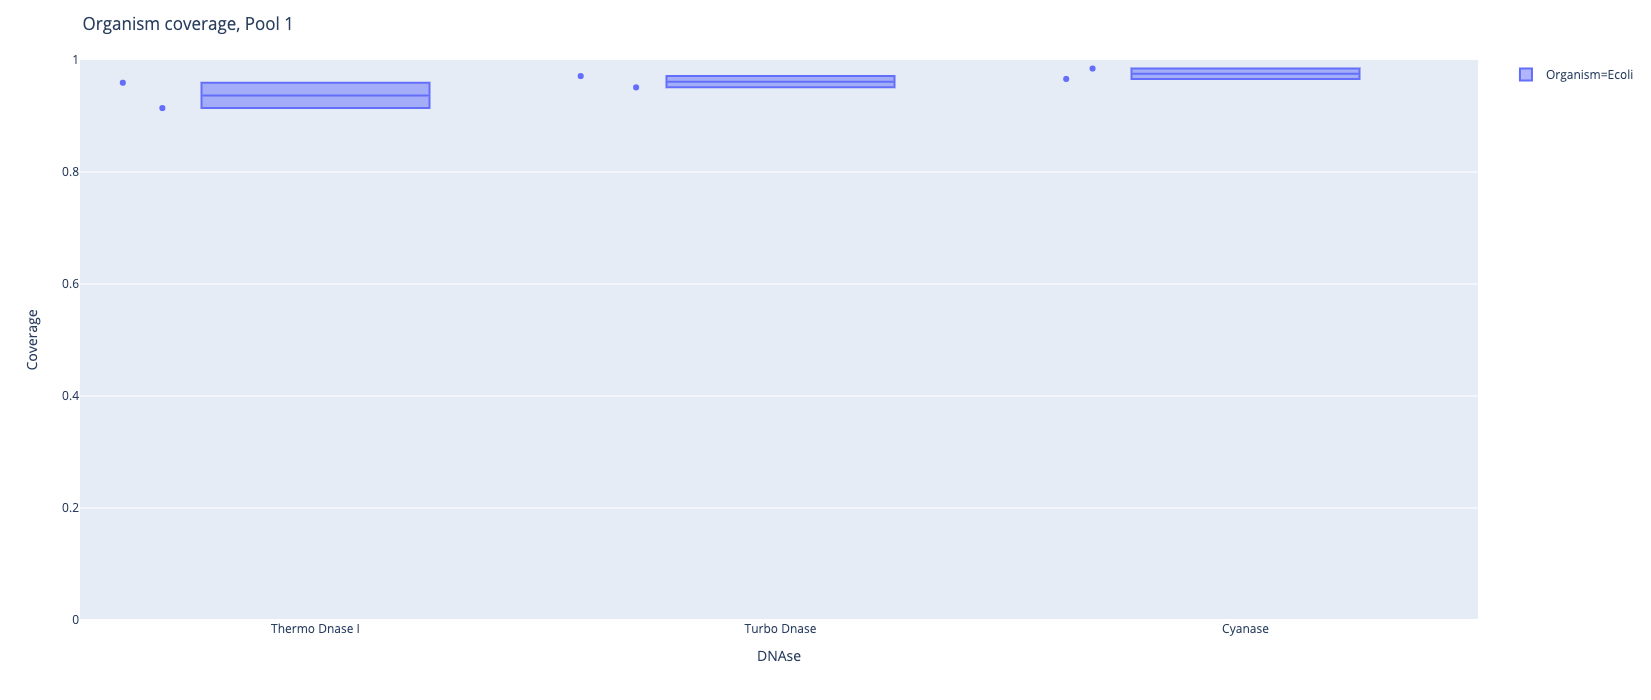

In [29]:
org_list = ['Ecoli']
fig = px.box(merged_melt_cov[(merged_melt_cov['Pool'] == 'Pool 1') & (merged_melt_cov['Organism'].isin(org_list))],
             x='DNAse', y='Coverage', color='Organism',
             points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism coverage, Pool 1')
fig.update_yaxes(range=[0, 1])
fig.show()
fig.write_html('plots/Organism_coverage_pool1.html')

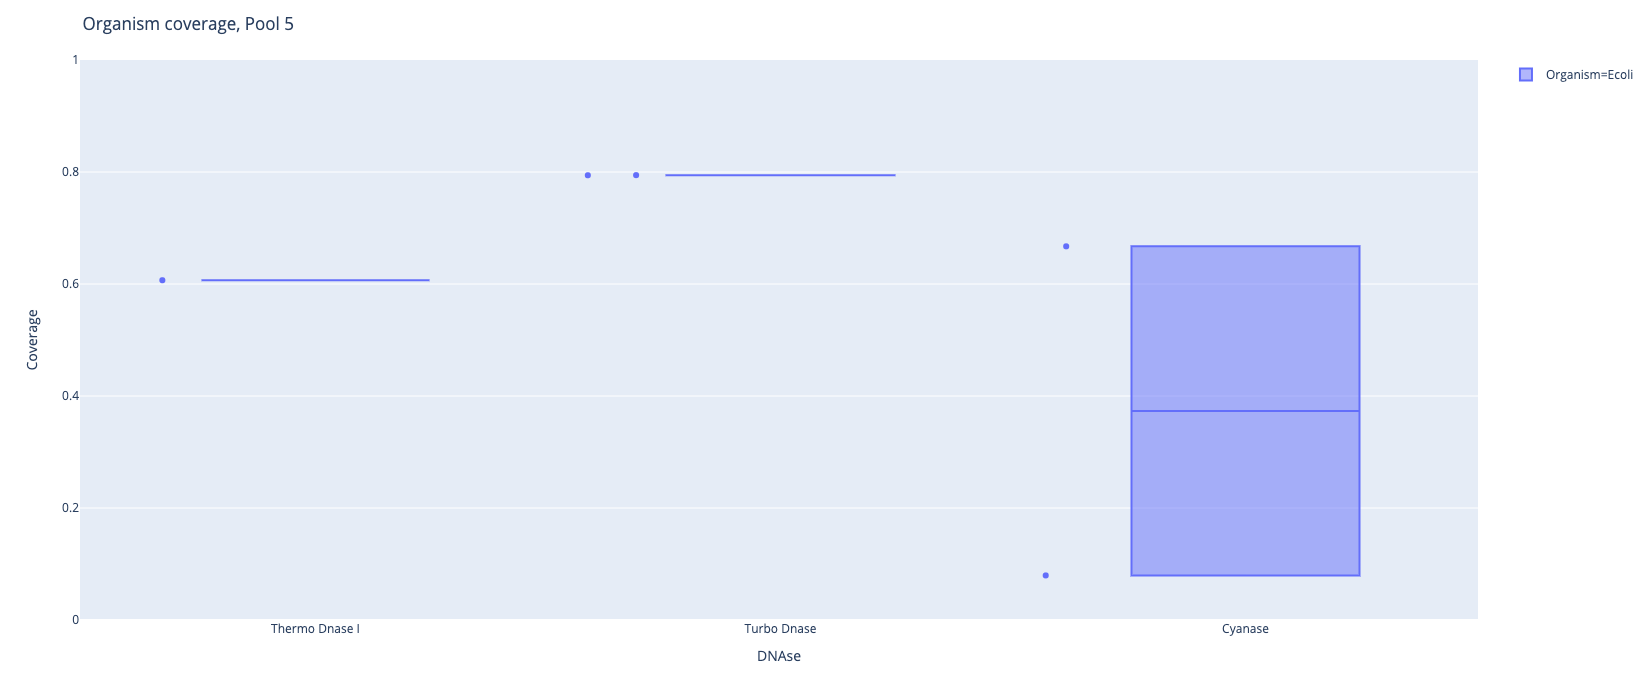

In [31]:
org_list = ['Ecoli']
fig = px.box(merged_melt_cov[(merged_melt_cov['Pool'] == 'Pool 5') & (merged_melt_cov['Organism'].isin(org_list)) & ~(merged_melt_cov['Coverage'] == 0)],
             x='DNAse', y='Coverage', color='Organism',
             points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism coverage, Pool 5')
fig.update_yaxes(range=[0, 1])
fig.show()
fig.write_html('plots/Organism_coverage_pool5.html')

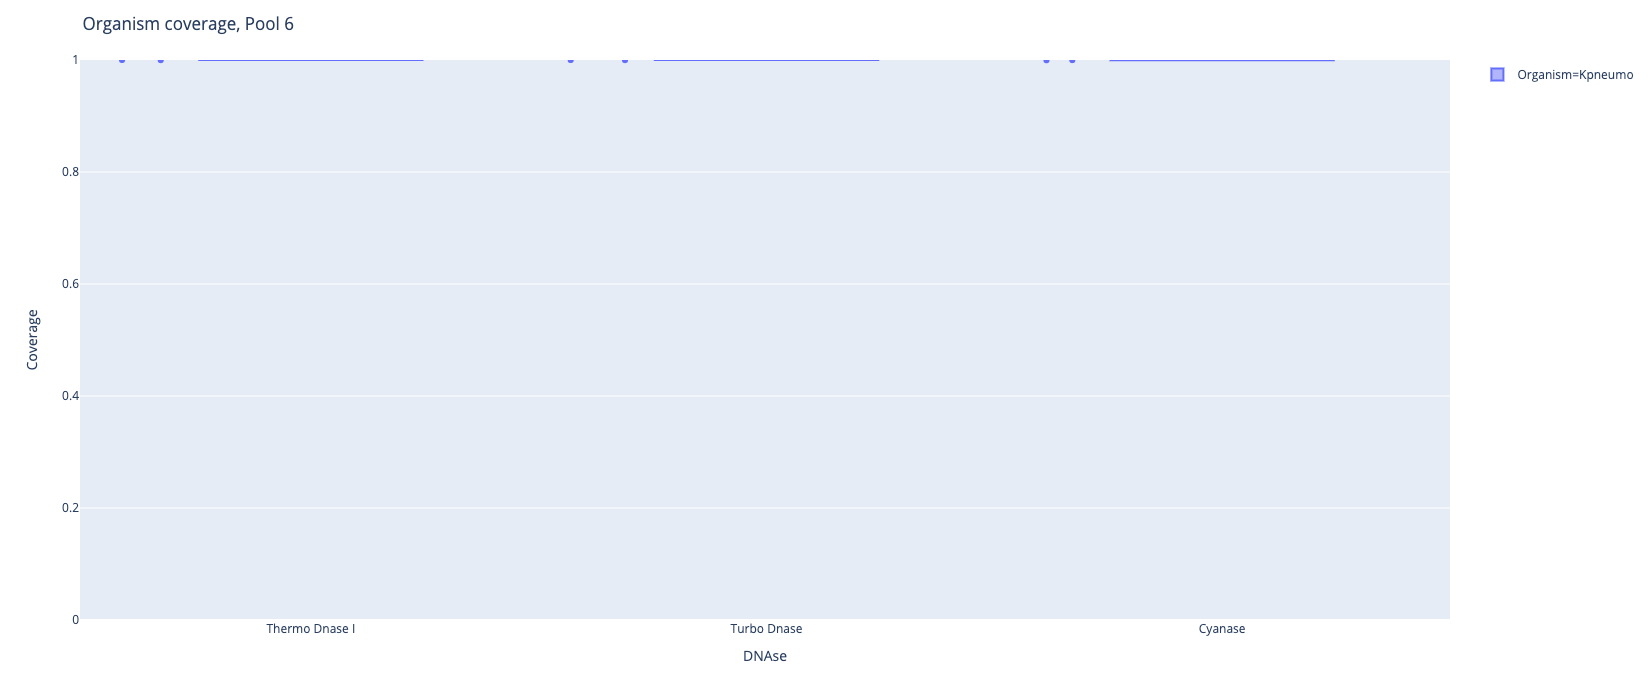

In [21]:
org_list = ['Kpneumo']
fig = px.box(merged_melt_cov[(merged_melt_cov['Pool'] == 'Pool 6') & (merged_melt_cov['Organism'].isin(org_list))],
             x='DNAse', y='Coverage', color='Organism',
             points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism coverage, Pool 6')
fig.update_yaxes(range=[0, 1])
fig.show()
fig.write_html('plots/Organism_coverage_pool6.html')

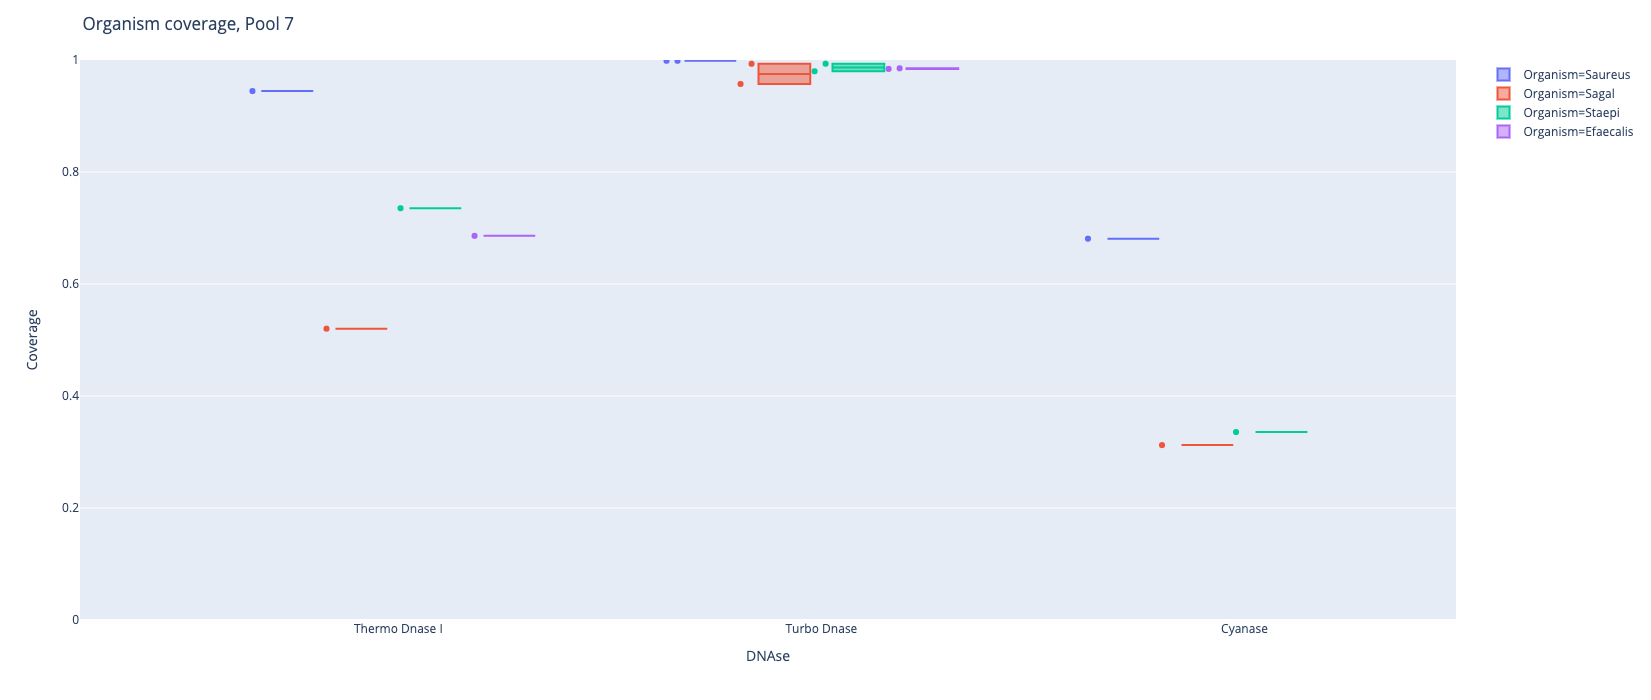

In [32]:
org_list = ['Saureus', 'Sagal', 'Staepi', 'Efaecalis', 'Human']
fig = px.box(merged_melt_cov[(merged_melt_cov['Pool'] == 'Pool 7') & (merged_melt_cov['Organism'].isin(org_list)) & ~(merged_melt_cov['Coverage'] == 0)],
             x='DNAse', y='Coverage', color='Organism',
             points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism coverage, Pool 7')
fig.update_yaxes(range=[0, 1])
fig.show()
fig.write_html('plots/Organism_coverage_pool7.html')

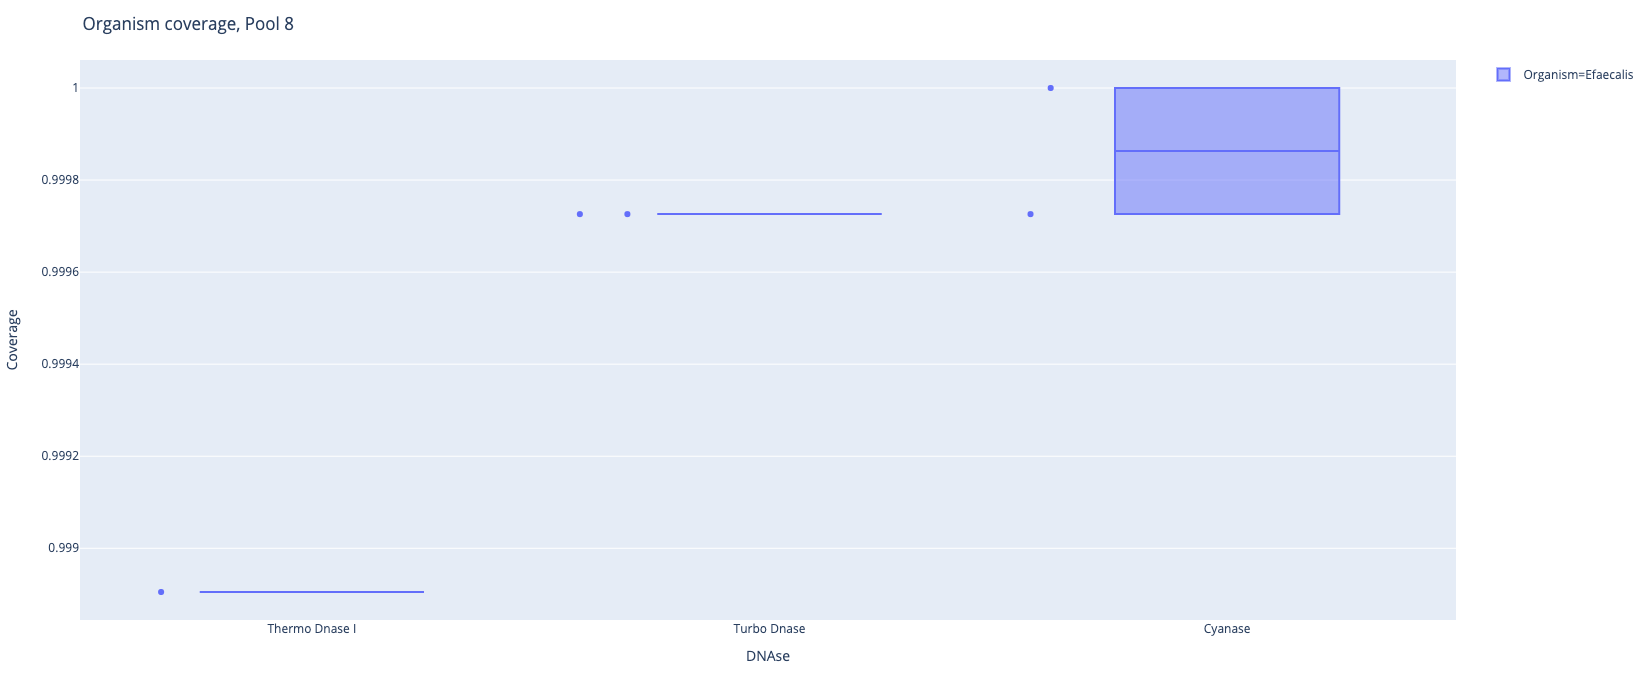

In [33]:
org_list = ['Efaecalis']
fig = px.box(merged_melt_cov[(merged_melt_cov['Pool'] == 'Pool 8') & (merged_melt_cov['Organism'].isin(org_list)) & ~(merged_melt_cov['Coverage'] == 0)],
             x='DNAse', y='Coverage', color='Organism',
             points='all', hover_data=['Accession'])
fig.update_layout(height=700, title='Organism coverage, Pool 8')
fig.show()
fig.write_html('plots/Organism_coverage_pool8.html')

In [24]:
merged.columns

Index(['Accession', 'total_reads', 't7_reads', 't7_normalized_reads',
       'ecoli_reads', 'ecoli_normalized_reads', 'ecoli_coverage',
       'kpneumo_reads', 'kpneumo_normalized_reads', 'kpneumo_coverage',
       'calbicans_reads', 'calbicans_normalized_reads', 'calbicans_coverage',
       'saureus_reads', 'saureus_normalized_reads', 'saureus_coverage',
       'sagal_reads', 'sagal_normalized_reads', 'sagal_coverage',
       'sepiderm_reads', 'sepiderm_normalized_reads', 'sepiderm_coverage',
       'efaecalis_reads', 'efaecalis_normalized_reads', 'efaecalis_coverage',
       'Human', 'Bacteria', 'Virus', 'Parasite', 'Fungus', 'Unclassified',
       'DNAse', 'Pool', 'Pool replicate', 'Organism spike'],
      dtype='object')

In [27]:
merged['Description'] = merged['DNAse'] + ', ' + merged['Pool replicate'].astype(str)
merged_melt2 = pd.melt(merged, value_vars=['Human', 'Bacteria', 'Virus', 'Unclassified', 'Fungus', 'Parasite'], id_vars=['Description', 'Accession'],
                      value_name='Normalized reads', var_name='Organism')
merged_melt2 = merged_melt2.sort_values(['Accession', 'Description', 'Organism'])
merged_melt2.head()

,Description,Accession,Organism,Normalized reads
29,"Thermo Dnase I, Pool 1a",IDBD-D101193,Bacteria,8.888296e+06
116,"Thermo Dnase I, Pool 1a",IDBD-D101193,Fungus,1.551197e+04
0,"Thermo Dnase I, Pool 1a",IDBD-D101193,Human,5.105814e+05
145,"Thermo Dnase I, Pool 1a",IDBD-D101193,Parasite,3.345867e+03
87,"Thermo Dnase I, Pool 1a",IDBD-D101193,Unclassified,5.690404e+05


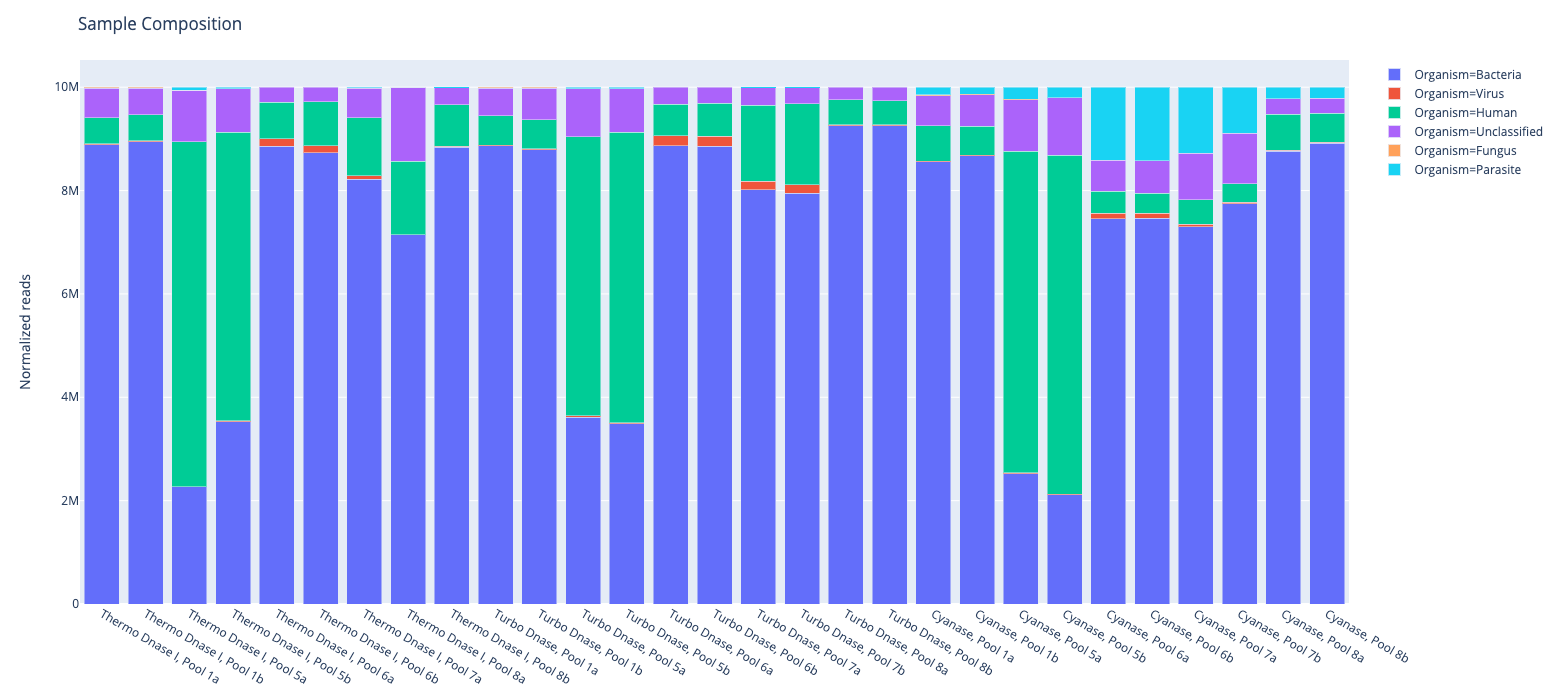

In [29]:
fig = px.bar(merged_melt2, x='Description', y='Normalized reads', color='Organism', barmode='stack',
             category_orders={'Organism': ['Bacteria', 'Virus', 'Human', 'Unclassified', 'Fungus', 'Parasite']})
fig.update_layout(xaxis_title=None, height=700, title='Sample Composition')
fig.show()
fig.write_html('plots/Sample_composition.html')